<a href="https://colab.research.google.com/github/cufuentes/CodingDojo/blob/main/KNN_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#imports
import pandas as pd
import numpy as np
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
#load data
filename ="/content/abalone.data"
df = pd.read_csv(filename, names = [
"Sex",
	"Length",
	"Diameter",
	"Height",
	"Whole weight",
	"Shucked weight",
	"Viscera weight",
	"Shell weight",
	"Rings"])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df["Sex"].value_counts(normalize=True)

Sex
M    0.365813
I    0.321283
F    0.312904
Name: proportion, dtype: float64

En base a esto podemos decir que sí es un conjunto normalizado

In [21]:
#train test split
X=df.drop(columns="Sex")
y=df["Sex"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

#instanciamos el scaler

scaler = StandardScaler()

#instanciamos el modelo

knn = KNeighborsClassifier(n_neighbors = 5)

#generamos un pipeline

pipe = make_pipeline(scaler,knn)

#ajustamos a datos de train

pipe.fit(X_train,y_train)

#predecimos datos de test

predictions = pipe.predict(X_test)
predictions

array(['F', 'M', 'M', ..., 'F', 'I', 'I'], dtype=object)

In [22]:
#evaluamos el modelo (exactitud modelo por defecto)
pipe.score(X_test,y_test)

0.5473684210526316

In [27]:
#iteramos para encontrar modelo óptimo
iterator = list(range(1,15))

#instanciamos el scaler

scaler = StandardScaler()

scores =[]
#instanciamos el modelo e iteramos
for i in iterator:
  knn_it = KNeighborsClassifier(n_neighbors = i)
  #generamos un pipeline
  pipe_it = make_pipeline(scaler,knn_it)
  #ajustamos a datos de train
  pipe_it.fit(X_train,y_train)
  scores.append([pipe_it.score(X_test,y_test)])
scores

[[0.5014354066985646],
 [0.5023923444976076],
 [0.5330143540669856],
 [0.5196172248803828],
 [0.5473684210526316],
 [0.538755980861244],
 [0.5416267942583732],
 [0.5311004784688995],
 [0.5502392344497608],
 [0.55311004784689],
 [0.5578947368421052],
 [0.5483253588516747],
 [0.5435406698564593],
 [0.5349282296650718]]

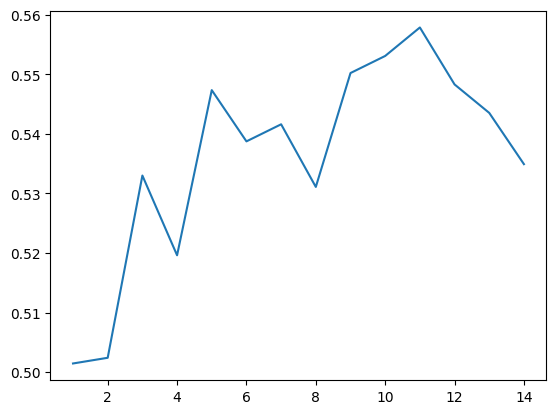

In [28]:
plt.plot(iterator,scores)

El mejor resultado se obtiene con 11 estimadores

In [29]:
#definimos nuevamente el modelo con el óptimo
#instanciamos el scaler

scaler = StandardScaler()

#instanciamos el modelo

knn = KNeighborsClassifier(n_neighbors = 11)

#generamos un pipeline

pipe = make_pipeline(scaler,knn)

#ajustamos a datos de train

pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

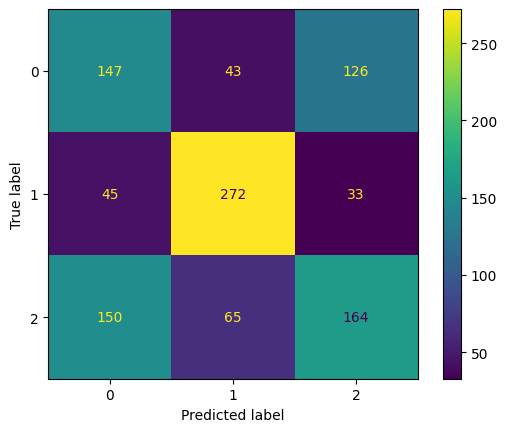

In [31]:
#creamos la matriz de confusion
prediction = pipe.predict(X_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()